In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as patches

import df_helpers as helper
dirs = helper.dirs()

## Import TPM, Norm_counts and Sigs

In [2]:
## Import and Prepare TPM
TPM_df = pd.read_excel(f'{dirs.deseq2input}/TPM.xlsx')
TPM_df.dropna(inplace=True)
TPM_df.set_index('gene_name',drop=True, inplace=True)
TPM_df = TPM_df[TPM_df.columns.to_list()[2:]].T
TPM_norm_log1p_df = TPM_df.apply(np.log1p)
TPM_norm_log1p_df = TPM_norm_log1p_df.iloc[[0,1,2,3,5,6,8]]
TPM_norm_log1p_df[['SETD1B','SETD1A']]

FileNotFoundError: [Errno 2] No such file or directory: '2. DESeq2 Input/TPM.xlsx'

In [27]:
## Import and Prepare DESeq2 normcounts
norm_counts_df = helper.read_normcounts()
norm_counts_df = norm_counts_df[norm_counts_df.sum(axis=1)>100]
norm_log1p_df = norm_counts_df.apply(np.log1p)
# norm_log1p_df = norm_log1p_df.iloc[[0,1,2,3,5,6,8]]
norm_log1p_df

,A0,A1,A2,A3,A7,A10,C0,C1,C2,C3,...,X2,X3,X7,X10,Z0,Z1,Z2,Z3,Z7,Z10
Symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,6.204790,6.587800,6.366158,6.338734,6.471204,6.419233,5.941967,6.512450,6.333446,6.146806,...,6.569262,6.288198,6.250512,6.245192,5.932318,6.549515,6.495280,6.431981,6.289384,6.439832
TNMD,0.776417,1.187979,1.448547,0.713274,1.822448,1.792484,1.190051,1.204467,1.454117,0.000000,...,2.200783,1.844895,2.560105,2.451766,2.129971,2.395171,2.189654,1.955210,2.314080,3.286449
DPM1,7.667744,7.354430,7.279547,7.167519,7.155512,7.029957,7.398144,7.406100,7.296501,7.315476,...,7.030425,6.837776,6.665524,6.703467,6.937871,6.897553,6.948773,7.026929,6.790966,6.719744
SCYL3,4.743592,4.618477,4.716134,4.539232,4.611054,4.595981,4.575375,4.547533,4.867849,4.788516,...,4.648355,4.669653,4.648762,4.493198,4.511241,4.556636,4.547782,4.301153,4.590433,4.512145
C1orf112,5.385086,5.428926,5.235006,5.215786,5.620076,5.591854,5.421835,5.253848,5.212900,5.235909,...,5.587483,5.279844,5.654252,5.685316,5.119785,5.210471,5.537123,5.513221,5.718835,5.788506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC068587.4,3.042253,3.653961,3.690954,3.334245,3.673352,3.466579,3.387457,3.239357,3.418589,3.392957,...,3.667461,4.072676,4.002180,3.686352,3.233265,3.980979,3.827525,3.666772,3.623339,4.136935
MIR5087,1.508735,1.715759,2.270592,2.338527,2.807048,2.303368,1.190051,1.504626,2.277117,1.968724,...,1.795096,3.181612,2.297863,3.060282,1.995434,2.110330,1.969825,2.998862,1.536060,2.754487
MIR522,1.739532,3.261357,2.376836,1.825083,1.413956,1.946656,1.904808,2.080059,2.277117,1.813946,...,3.614812,3.411177,1.787388,1.295331,3.146041,4.046465,3.726703,3.327230,2.115351,1.324069


In [5]:
# ## Import significant genes DESeq2 results
sigs = helper.read_sigs(None,'DCTRL0')


## Heatmap Custom Genes

In [6]:
sigs_df = sigs
ectoderm_markers = ['OTX2','BMP4','CHRD','FGF8','FOXJ3','NES','NOG','TP63','PAX2','PAX6','SOX1','TUBB3']
mesoderm_markers = ['TBXT','FOXF1','EOMES','FOXC1','GSC','HAND1','HAND2','SNAI1','SNAI2','TBX6','TWIST1','TWIST2']
endoderm_markers = ['GATA4','GATA6','SALL4','SOX7','SOX17','AFP','CTNNB1']
epiblast_markers = ['FGF4','DNMT3B','SOX11','SFRP2','SALL2','UTF1','SOX2','POU5F1','NANOG']
nucleoskeleton_proteins = ['SYNE1','SYNE2','SUN1','SUN2','LMNA','LMNB1','LMNB2','EMD','LEMD1','LEMD2','LEMD3','TMPO','BANF1','CBX5']
chromain_modifiers = ['SETD1A','SETD1B','SETD2','KDM5B','DNMT3B','DNMT3A','EZH2',]

## Custom Gene sets
gene_set = {}
for gene_set_collection in os.listdir(msigdb):
    with open(f'{msigdb}/{gene_set_collection}') as gmt:
        h = gmt.read()
    gene_set[h.split()[0]] = h.split()[2:]
# GOI = gene_set['GOBP_HISTONE_H3_K4_METHYLATION']
GOI = [gene for gene in h3k4me3 if gene in sigs_df.Symbol.to_list()]
# sigGOI_normcounts_df = 
# norm_log1p_df[sigGOI_df].T
sigGOI_df = sigs_df.set_index('Symbol').T[GOI]
TPM_signormcounts_df = TPM_norm_log1p_df[sigGOI_df.columns]
signormcounts_df = norm_log1p_df[sigGOI_df.columns]


NameError: name 'h3k4me3' is not defined

In [ ]:
cluster_df = norm_log1p_df[GOI].T
ax = sns.clustermap(signormcounts_df.T,z_score=0, cmap = 'RdYlBu_r',figsize=(7,3),col_cluster=False,row_cluster=False)
ax.ax_heatmap.set_ylabel('')
ax.fig.subplots_adjust(right=0.7)
ax.ax_cbar.set_position((0.8, .2, .03, .4))
plt.savefig(f'{dirs.heatmaps}/nucleoskeleton_proteins Deseq2heatmap.png',dpi=300)

# ax = sns.clustermap(TPM_signormcounts_df.T, z_score=0, cmap = 'RdYlBu_r',figsize=(8,10),col_cluster=False,row_cluster=False)
# ax.ax_heatmap.set_ylabel('')
# ax.fig.subplots_adjust(right=0.7)
# ax.ax_cbar.set_position((0.8, .2, .03, .4))
# plt.savefig(f'{heatmaps}/TPM Custom GOI heatmap.png',dpi=300)


## Heatmap all Significant genes

In [41]:
newcols = ['A0', 'C0', 'D0', 'W0', 'X0', 'Z0',
           'A1', 'C1', 'D1',  'W1', 'X1', 'Z1',
           'A2', 'C2', 'D2', 'W2', 'X2', 'Z2',
           'A3', 'C3', 'D3', 'W3', 'X3', 'Z3',
           'A7', 'C7', 'D7', 'W7', 'X7', 'Z7',
           'A10', 'C10', 'D10', 'W10', 'X10',  'Z10',
           'H_CTRL1', 'H_CTRL2', 'H_CTRL3']
norm_log1p_df[newcols]

,A0,C0,D0,W0,X0,Z0,A1,C1,D1,W1,...,Z7,A10,C10,D10,W10,X10,Z10,H_CTRL1,H_CTRL2,H_CTRL3
Symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,6.204790,5.941967,5.896992,6.132107,6.117173,5.932318,6.587800,6.512450,6.426605,6.481997,...,6.289384,6.419233,6.176929,6.321994,6.466827,6.245192,6.439832,6.676067,6.554671,6.821476
TNMD,0.776417,1.190051,1.130733,1.438085,1.776423,2.129971,1.187979,1.204467,1.383956,1.863022,...,2.314080,1.792484,1.398134,0.976926,3.162983,2.451766,3.286449,2.975083,1.822732,2.308043
DPM1,7.667744,7.398144,7.296984,7.054981,7.008011,6.937871,7.354430,7.406100,7.288539,6.910297,...,6.790966,7.029957,6.877450,6.806467,6.637582,6.703467,6.719744,6.336710,6.214922,6.558847
SCYL3,4.743592,4.575375,4.710801,4.600363,4.470413,4.511241,4.618477,4.547533,4.792697,4.194464,...,4.590433,4.595981,4.669566,4.747393,4.442186,4.493198,4.512145,4.388620,4.340627,4.555656
C1orf112,5.385086,5.421835,5.200824,5.272118,5.087626,5.119785,5.428926,5.253848,5.464954,5.230977,...,5.718835,5.591854,5.508752,5.614172,5.697641,5.685316,5.788506,5.715791,5.448537,5.960069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC068587.4,3.042253,3.387457,3.181265,3.201088,3.314436,3.233265,3.653961,3.239357,3.710529,4.047361,...,3.623339,3.466579,3.728945,4.118292,3.680807,3.686352,4.136935,3.669068,4.147331,3.962943
MIR5087,1.508735,1.190051,0.717334,2.004886,1.086362,1.995434,1.715759,1.504626,1.943237,1.314151,...,1.536060,2.303368,2.211241,2.313479,2.028626,3.060282,2.754487,1.410631,1.977753,1.861415
MIR522,1.739532,1.904808,2.121392,3.243768,2.621953,3.146041,3.261357,2.080059,2.769664,4.194464,...,2.115351,1.946656,0.701056,0.603299,1.060132,1.295331,1.324069,0.000000,0.000000,0.000000


/Users/alexesclamado/.pyenv/versions/3.12.1/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


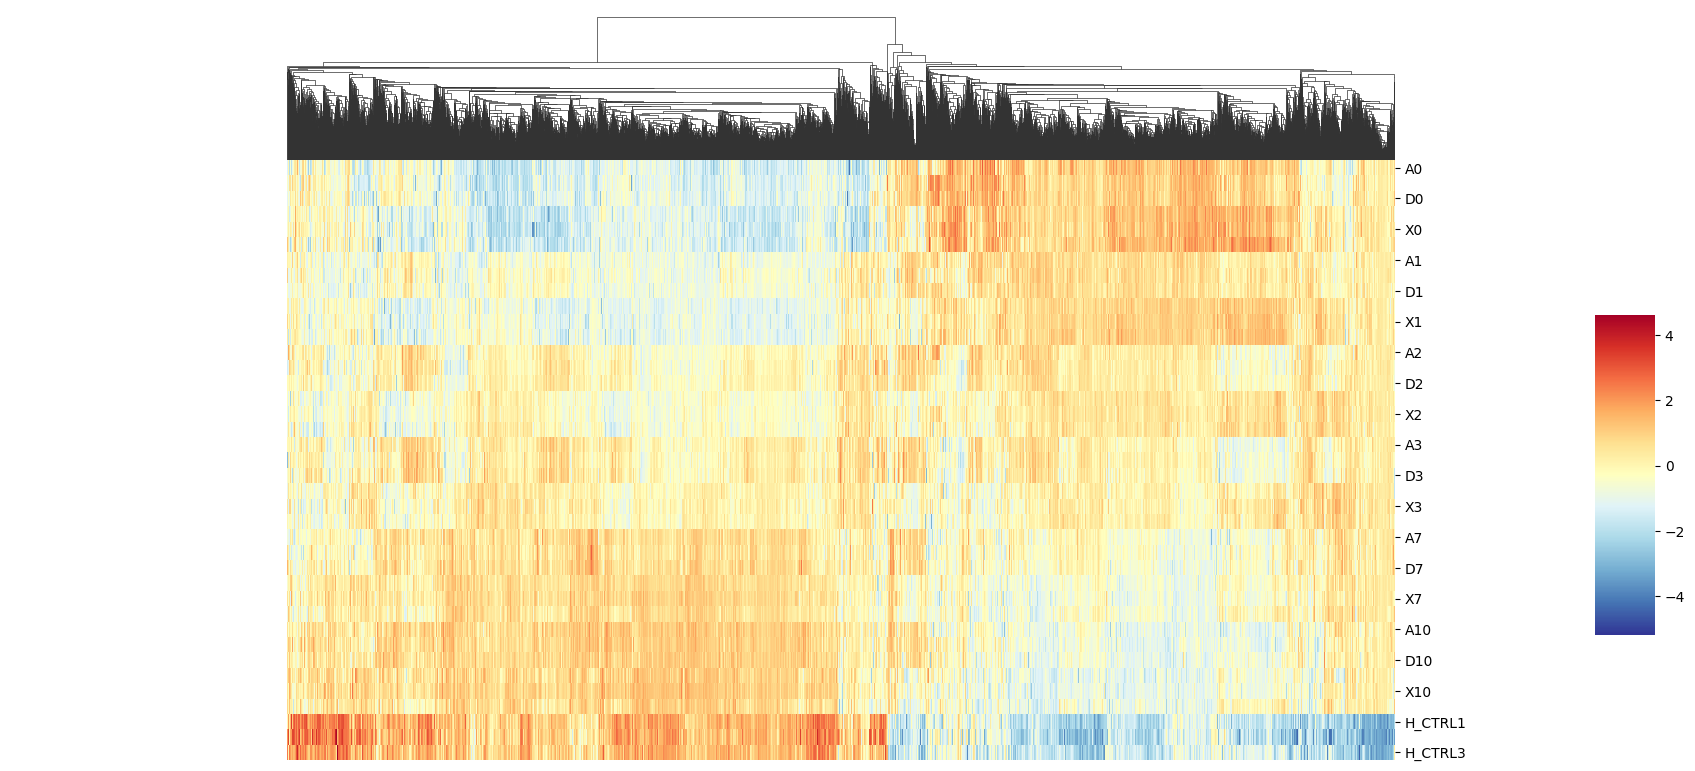

In [40]:
sigs_df = sigs
sigGOI_normcounts_df = norm_log1p_df.loc[sigs_df.Symbol.dropna().to_list()]
ax = sns.clustermap(sigGOI_normcounts_df.T, z_score=1, cmap = 'RdYlBu_r',figsize=(20,8),
                    col_cluster=True,row_cluster=False,xticklabels=False)
ax.ax_heatmap.set_xlabel('')
ax.fig.subplots_adjust(right=0.7)
ax.ax_cbar.set_position((0.8, .2, .03, .4))
plt.savefig(f'{dirs.heatmaps}/GOI DCTRL0 allsig heatmap.png',dpi=300)

## Heatmap Manually

In [ ]:
log10_norcounts_df = (norm_counts_df+1).apply(np.log10)
D3_mean = log10_norcounts_df.iloc[:3].mean()
D5_mean = log10_norcounts_df.iloc[3:6].mean()
D7_mean = log10_norcounts_df.iloc[6:9].mean()
manheatmap_df = pd.DataFrame(data={
    'Day 3': D3_mean,
    'Day 5': D5_mean,
    'Day 7': D7_mean
}).T

In [ ]:
cluster=0
clustered_df = pd.read_excel(f'{gsea}/clustered_normcounts.xlsx',sheet_name=cluster)
clustered_df.set_index('Symbol',inplace=True)
for cluster in range(17):
    temp = pd.read_excel(f'{gsea}/clustered_normcounts.xlsx',sheet_name=cluster)
    temp.set_index('Symbol',inplace=True)
    clustered_df = pd.concat([clustered_df,temp])
# clustered_df = (clustered_df+1).apply(np.log10)

In [ ]:
set = 'apical_junction'
for set in ['ecto','meso','endo','epi','nucleoskeleton','enrichr','hippo','ch_mods','apical_junction']:
    ectoderm_markers = ['OTX2','BMP4','CHRD','FGF8','FOXJ3','NES','NOG','TP63','PAX2','PAX6','SOX1','TUBB3']
    if set == 'ecto': heatmap_counts = manheatmap_df[ectoderm_markers]

    mesoderm_markers = ['TBXT','FOXF1','EOMES','FOXC1','GSC','HAND1','HAND2','SNAI1','SNAI2','TBX6','TWIST1','TWIST2']
    if set == 'meso': heatmap_counts = manheatmap_df[mesoderm_markers]

    endoderm_markers = ['GATA4','GATA6','SALL4','SOX7','SOX17','AFP','CTNNB1']
    if set == 'endo': heatmap_counts = manheatmap_df[endoderm_markers]

    epiblast_markers = ['FGF4','DNMT3B','SOX11','SFRP2','SALL2','UTF1','SOX2','POU5F1','NANOG']
    if set == 'epi': heatmap_counts = manheatmap_df[epiblast_markers]

    nucleoskeleton_proteins = ['SYNE1','SYNE2','SUN1','SUN2','LMNA','LMNB1','LMNB2','EMD','LEMD1',
                            'LEMD2','LEMD3','TMPO','BANF1','CBX5']
    if set == 'nucleoskeleton': heatmap_counts = manheatmap_df[nucleoskeleton_proteins]

    chromain_modifiers = ['SETD1A','SETD1B','SETD2','KDM5B','DNMT3B','DNMT3A','EZH2',]
    if set == 'ch_mods': heatmap_counts = manheatmap_df[chromain_modifiers]

    enrichr = pd.read_excel(f'{gsea}/enrichr.xlsx')
    hippo = enrichr[enrichr.Term =="Hippo signaling pathway"].Genes.values[0].split(';')
    if set == 'hippo': heatmap_counts = manheatmap_df[hippo]
    
    enrichr = pd.read_excel(f'{gsea}/enrichr.xlsx')
    apical_junction = enrichr[enrichr.Term =="Apical Junction"].Genes.values[0].split(';')
    if set == 'apical_junction': heatmap_counts = manheatmap_df[apical_junction]

    h3k4me3 = ['KMT2A','KMT2B','KMT2C','KMT2D','SETD1A','SETD1B','KDM2B','KDM5A','KDM5B','KDM5C','KDM5D']
    if set == 'h3k4me3': heatmap_counts = manheatmap_df[h3k4me3]


    heatmap_counts.to_excel(f'{heatmaps}/Prism Plots/{set}.xlsx')

In [ ]:
heatmap_counts = manheatmap_df[h3k4me3]
width = 10
height = 1.6
plt.figure(figsize=(width,height))
ax = sns.heatmap(heatmap_counts, cmap = 'magma',vmin = 0)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('')
plt.tight_layout()

ax.axhline(y=0, color='k',linewidth=2)
ax.axhline(y=heatmap_counts.shape[0], color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=2)
ax.axvline(x=heatmap_counts.shape[1], color='k',linewidth=3)

# plt.savefig(f'{heatmaps}/{set}',dpi=300)